**Building a CNN classifier using TensorFlow for MNIST Fashion Dataset**

MNIST Fashion is a dataset of Zalando's article images - consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

Objective - to use MNIST-Fashion data set to predict/identify different fashion products from the given images using Machine Learning.

## Setup

In [1]:
# Import the necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Loading the Dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. 

For more infor: https://github.com/zalandoresearch/fashion-mnist

In [2]:
fashion_mnist = keras.datasets.fashion_mnist # loading the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() 

In [3]:
y_test.shape

(10000,)

In [4]:
X_train_full.shape 

(60000, 28, 28)

The training set contains 60,000 grayscale images, each 28x28 pixels.

## Splitting the Dataset

The dataset is already split between training set and test set, it can be useful to split the training set further to have a validation set.

Let's split the full training set into a validation set and a (smaller) training set. We will also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [6]:
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:",X_test.shape)

Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (10000, 28, 28)


Thus, the train set contains 55000 images, the validation set contains 5,000 images, and the test set contains 10,000 images.

In [7]:
y_valid.shape

(5000,)

## Visualizing the Data

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Class label is: 4
Class name is: Coat


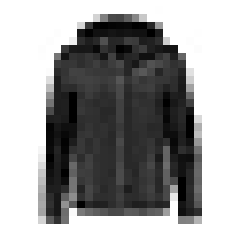

In [9]:
print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

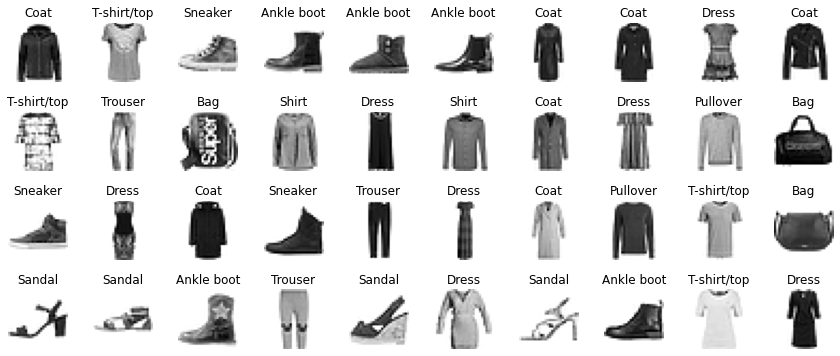

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building the Model

In [11]:
keras.backend.clear_session() # clearing session
np.random.seed(42) 
tf.random.set_seed(42) 

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.layers

In [14]:
model.summary() # viewing the summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
sgd = keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

## Fitting the Model

In [16]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid)) # fitting the model to training data

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.5342 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4124 - accuracy: 0.8564 - val_loss: 0.3915 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8621 - val_loss: 0.3744 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3750 - accuracy: 0.8675 - val_loss: 0.3718 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3632 - accuracy: 0.8716 - val_loss: 0.3617 - val_accuracy:

In [17]:
history.params 

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [18]:
hidden1 = model.layers[1] # first layer
print(hidden1.name)

dense


In [19]:
weights, biases = hidden1.get_weights() # getting the weights and biases
print(weights.shape)
weights

(784, 300)


array([[ 0.02428621, -0.00887149, -0.02189048, ..., -0.02774751,
         0.03858816, -0.06890351],
       [ 0.00458337, -0.03111771, -0.0586676 , ...,  0.00591962,
        -0.02764504, -0.04163538],
       [-0.06295505, -0.06924617,  0.07103885, ..., -0.04252302,
         0.0712138 , -0.07312792],
       ...,
       [-0.01694321,  0.02149452, -0.05391731, ...,  0.00037465,
         0.00038541,  0.06317136],
       [ 0.07235663, -0.07057827,  0.07040679, ..., -0.00127725,
        -0.00168522,  0.03152846],
       [-0.0622782 ,  0.01552784, -0.02585155, ..., -0.00466257,
         0.0023119 , -0.06735867]], dtype=float32)

In [20]:
biases

array([ 0.1734203 ,  0.04331314, -0.00029627, -0.10523964,  0.00300405,
        0.09547766,  0.04953028, -0.01076079, -0.02332509,  0.07070001,
       -0.00271627, -0.01061932,  0.09199019,  0.00428276,  0.16562708,
        0.08320349, -0.02069582,  0.04056127,  0.09732205, -0.12608662,
        0.11600385,  0.13960657,  0.00182779,  0.03900981,  0.05458396,
        0.04516074, -0.00622209,  0.20675963,  0.15467581,  0.01823414,
        0.10124981, -0.00472954,  0.04889691, -0.00348026, -0.03442223,
        0.04381112,  0.14114   , -0.07842134,  0.19918925, -0.06898574,
        0.04909032,  0.0030256 ,  0.04927373,  0.03371538,  0.00742467,
       -0.11244632, -0.01134727,  0.07280725,  0.00339837,  0.14837112,
       -0.00299264,  0.17938522,  0.12460054, -0.00887462,  0.02833748,
        0.04523075,  0.05929824, -0.02470272,  0.0014332 , -0.00207727,
        0.12566815,  0.03263529,  0.03954618, -0.03519354, -0.00989272,
       -0.01005167,  0.06708642, -0.01432862, -0.00418029, -0.01

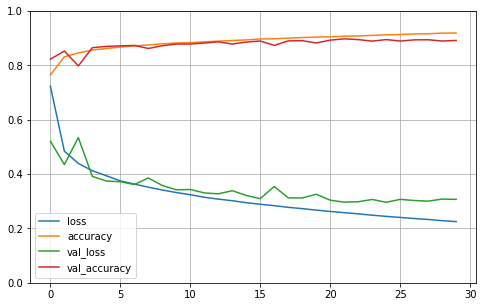

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluating the Model Perormance

In [22]:
model.evaluate(X_test, y_test) # Evaluating the model

313/313 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8819


[0.3407917618751526, 0.8819000124931335]

Let us predict and visualize the first 3 samples from the test data.

In [23]:
# Get predictions as probabilities
y_pred_prob = model.predict(X_test[:3])

# Convert probabilities to class indices
y_pred = tf.argmax(y_pred_prob, axis=1).numpy()

print(y_pred)
print([class_names[index] for index in y_pred])


[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


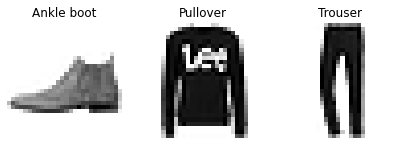

In [24]:
plt.figure(figsize=(7, 3))
for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()